In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = [
    ('lr', LogisticRegression(max_iter=200)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('ada', AdaBoostClassifier()),
    ('mlp', MLPClassifier()),
    ('lda', LinearDiscriminantAnalysis())
]

# Create voting classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

# Train voting classifier
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy on Breast Cancer Wisconsin dataset:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy on Breast Cancer Wisconsin dataset: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lr: 0.956140350877193
dt: 0.9473684210526315
rf: 0.9649122807017544
svc: 0.9473684210526315
knn: 0.956140350877193
nb: 0.9736842105263158
ada: 0.9736842105263158
mlp: 0.9649122807017544
lda: 0.956140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier: 0.9736842105263158


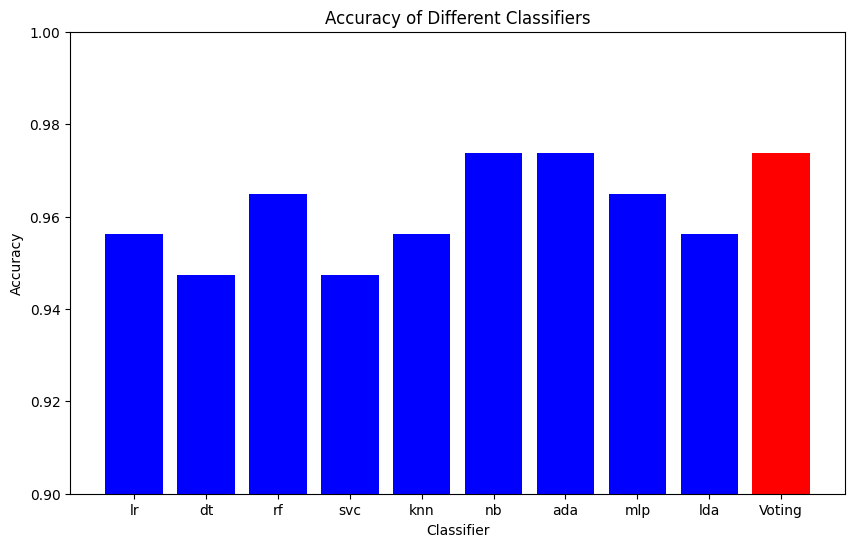

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = [
    ('lr', LogisticRegression(max_iter=200)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
    ('ada', AdaBoostClassifier()),
    ('mlp', MLPClassifier()),
    ('lda', LinearDiscriminantAnalysis())
]

# Train and calculate accuracy for each classifier
accuracies = []
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name}: {accuracy}")

# Voting Classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier: {accuracy_voting}")

# Plot accuracies
names = [name for name, _ in classifiers] + ['Voting']
plt.figure(figsize=(10, 6))
plt.bar(names, accuracies + [accuracy_voting], color=['blue']*len(classifiers) + ['red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0.9, 1.0)
plt.show()
